PRE-PROSESING DATASET

In [2]:
!pip install folium
!pip install osmnx

In [22]:
import pandas as pd
import numpy as np
from collections import deque
import folium
import osmnx as ox
import networkx as nx
import sys
import time

In [1]:
df=pd.read_csv(r'jalur.csv')
df

NameError: name 'pd' is not defined

In [ ]:
df.columns = df.iloc[1]
df = df[2:].reset_index(drop=True)
df

NameError: name 'df' is not defined

In [ ]:
df.columns

Index([          nan,    'Surabaya',      'Gresik',    'Sidoarjo',
         'Mojokerto',     'Jombang',  'Bojonegoro',   'Lamongan ',
             'Tuban',     'Madiun ',       'Ngawi',     'Magetan',
          'Ponorogo',     'Pacitan',      'Kediri',     'Nganjuk',
       'Tulungagung',      'Blitar', 'Trenggalek ',      'Malang',
         'Pasuruan ', 'Probolinggo',    'Lumajang',   'Bondowoso',
         'Situbondo',      'Jember',  'Banyuwangi',   'Bangkalan',
           'Sampang',   'Pamekasan',     'Sumenep',           nan,
                 nan],
      dtype='object', name=1)

In [ ]:
df.drop(index=0).reset_index(drop=True)


1,NaN,Surabaya,Gresik,Sidoarjo,Mojokerto,Jombang,Bojonegoro,Lamongan,Tuban,Madiun,...,Bondowoso,Situbondo,Jember,Banyuwangi,Bangkalan,Sampang,Pamekasan,Sumenep,NaN,NaN
0,Surabaya,-,18,23,49,79,108,45,103,169,...,191,194,197,288,28,90,123,175,NaN,NaN
1,Gresik,18,-,41,67,97,90,27,85,187,...,209,212,215,306,46,108,141,193,NaN,NaN
2,Sidoarjo,23,41,-,72,102,131,68,126,192,...,168,171,174,265,51,113,146,198,NaN,NaN
3,Mojokerto,49,67,72,-,30,115,57,110,120,...,192,195,198,289,77,139,172,224,NaN,NaN
4,Jombang,79,97,102,30,-,85,80,81,90,...,222,225,228,319,107,169,202,254,NaN,NaN
5,Bojonegoro,108,90,131,115,85,-,63,65,110,...,298,202,305,396,136,198,231,283,NaN,NaN
6,Lamongan,45,27,68,57,80,63,-,58,177,...,236,239,242,333,73,135,168,220,NaN,NaN
7,Tuban,103,95,126,110,82,65,58,-,172,...,284,297,300,391,131,193,226,278,NaN,NaN
8,Madiun,169,187,192,128,90,110,177,182,-,...,312,315,338,407,127,259,292,344,NaN,NaN
9,Ngawi,181,199,264,132,102,78,189,184,32,...,324,327,330,42,409,271,304,356,NaN,NaN


In [ ]:
df.columns.values[0]="Kota/Kab"

In [ ]:
# Menghapus kolom 'nan'
df=df.iloc[:, :-2]
df


1,Kota/Kab,Surabaya,Gresik,Sidoarjo,Mojokerto,Jombang,Bojonegoro,Lamongan,Tuban,Madiun,...,Probolinggo,Lumajang,Bondowoso,Situbondo,Jember,Banyuwangi,Bangkalan,Sampang,Pamekasan,Sumenep
0,NaN,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
1,Surabaya,-,18,23,49,79,108,45,103,169,...,99,145,191,194,197,288,28,90,123,175
2,Gresik,18,-,41,67,97,90,27,85,187,...,117,163,209,212,215,306,46,108,141,193
3,Sidoarjo,23,41,-,72,102,131,68,126,192,...,76,122,168,171,174,265,51,113,146,198
4,Mojokerto,49,67,72,-,30,115,57,110,120,...,100,146,192,195,198,289,77,139,172,224
5,Jombang,79,97,102,30,-,85,80,81,90,...,130,176,222,225,228,319,107,169,202,254
6,Bojonegoro,108,90,131,115,85,-,63,65,110,...,207,253,298,202,305,396,136,198,231,283
7,Lamongan,45,27,68,57,80,63,-,58,177,...,144,190,236,239,242,333,73,135,168,220
8,Tuban,103,95,126,110,82,65,58,-,172,...,202,248,284,297,300,391,131,193,226,278
9,Madiun,169,187,192,128,90,110,177,182,-,...,220,266,312,315,338,407,127,259,292,344


In [ ]:
df_clean=df.dropna(axis=0)

In [ ]:
df_clean = df_clean.astype(str)
df_clean.replace('-', '0', inplace=True)


In [ ]:
# Identifikasi kolom yang ingin dikecualikan
exclude_columns = ['Kota/Kab']

# Ubah semua kolom kecuali yang di-exclude
for col in df_clean.columns:
    if col not in exclude_columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0).astype(int)

print(df_clean)


1      Kota/Kab  Surabaya  Gresik  Sidoarjo  Mojokerto  Jombang  Bojonegoro  \
1      Surabaya         0      18        23         49       79         108   
2        Gresik        18       0        41         67       97          90   
3      Sidoarjo        23      41         0         72      102         131   
4     Mojokerto        49      67        72          0       30         115   
5       Jombang        79      97       102         30        0          85   
6    Bojonegoro       108      90       131        115       85           0   
7     Lamongan         45      27        68         57       80          63   
8         Tuban       103      95       126        110       82          65   
9       Madiun        169     187       192        128       90         110   
10        Ngawi       181     199       264        132      102          78   
11      Magetan       193     211       216        144      114         113   
12     Ponorogo       198     216       221        1

In [ ]:
df_clean.to_csv('jalur_clean.csv')

In [7]:
data=pd.read_csv(r'C:\Users\Theopan gerard\OneDrive\Documents\Tugas_DAA\Project\jalur_clean.csv')

Algoritma


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   30 non-null     int64 
 1   Kota/Kab     30 non-null     object
 2   Surabaya     30 non-null     int64 
 3   Gresik       30 non-null     int64 
 4   Sidoarjo     30 non-null     int64 
 5   Mojokerto    30 non-null     int64 
 6   Jombang      30 non-null     int64 
 7   Bojonegoro   30 non-null     int64 
 8   Lamongan     30 non-null     int64 
 9   Tuban        30 non-null     int64 
 10  Madiun       30 non-null     int64 
 11  Ngawi        30 non-null     int64 
 12  Magetan      30 non-null     int64 
 13  Ponorogo     30 non-null     int64 
 14  Pacitan      30 non-null     int64 
 15  Kediri       30 non-null     int64 
 16  Nganjuk      30 non-null     int64 
 17  Tulungagung  30 non-null     int64 
 18  Blitar       30 non-null     int64 
 19  Trenggalek   30 non-null     in

In [ ]:
import pandas as pd
from queue import PriorityQueue
import math

def heuristic(current, unvisited, graph):
    min_distance = math.inf
    for city in unvisited:
        if city in graph[current]:
            min_distance = min(min_distance, graph[current][city])
    return min_distance

# Fungsi Best First Search untuk TSP dengan Heuristik
def best_first_search_tsp(graph, start, n):
    visited = [False] * n
    pq = PriorityQueue()
    pq.put((0, start, [start], list(graph.keys())))  # cost, current city, path, unvisited cities

    while not pq.empty():
        cost, current, path, unvisited = pq.get()

        # Jika semua kota telah dikunjungi, kembali ke kota asal
        if len(path) == n:
            path.append(start)
            print("Jalur terbaik: ", path)
            print("Total biaya: ", cost)
            return

        unvisited = [city for city in unvisited if city not in path]
        for i in range(n):
            city = list(graph.keys())[i]
            if city not in path:
                if city in graph[current]:
                    travel_cost = graph[current][city]
                    total_cost = cost + travel_cost
                    total_cost_with_heuristic = total_cost + heuristic(city, unvisited, graph)

                    pq.put((total_cost_with_heuristic, city, path + [city], unvisited))

    print("Tidak ada solusi yang ditemukan.")

best_first_search_tsp(graph, 'Sampang', 3)


NameError: name 'graph' is not defined

Mengubah dataset menjadi matriks adjency

In [ ]:
import numpy as np

# Daftar kota yang ingin dijadikan graph
kota_terpilih = ['Tuban','Ngawi', 'Pacitan', 'Blitar', 'Banyuwangi', 'Situbondo', 'Sumenep', 'Bangkalan', 'Sidoarjo', 'Probolinggo']

# Filter data berdasarkan kota terpilih
filtered_cities = data[data['Kota/Kab'].isin(kota_terpilih)]
cities = list(filtered_cities['Kota/Kab'])  # Hanya kota terpilih
graph = {}

# Bangun adjacency list berdasarkan kota terpilih
for city1 in cities:
    graph[city1] = {}
    for city2 in cities:
        if city1 != city2:
            try:
                distance = data.loc[data['Kota/Kab'] == city1, city2].values[0]
                graph[city1][city2] = distance
            except IndexError:
                graph[city1][city2] = float('inf')


print("Graph adjacency list berdasarkan kota terpilih:")
for city, neighbors in graph.items():
    print(f"{city}: {neighbors}")


Graph adjacency list berdasarkan kota terpilih:
Sidoarjo: {'Tuban': 126, 'Ngawi': 204, 'Pacitan': 298, 'Blitar': 144, 'Probolinggo': 76, 'Situbondo': 171, 'Banyuwangi': 265, 'Bangkalan': 51, 'Sumenep': 198}
Tuban: {'Sidoarjo': 126, 'Ngawi': 184, 'Pacitan': 279, 'Blitar': 170, 'Probolinggo': 202, 'Situbondo': 297, 'Banyuwangi': 391, 'Bangkalan': 131, 'Sumenep': 278}
Ngawi: {'Sidoarjo': 264, 'Tuban': 184, 'Pacitan': 139, 'Blitar': 134, 'Probolinggo': 232, 'Situbondo': 327, 'Banyuwangi': 42, 'Bangkalan': 409, 'Sumenep': 356}
Pacitan: {'Sidoarjo': 298, 'Tuban': 179, 'Ngawi': 139, 'Blitar': 182, 'Probolinggo': 352, 'Situbondo': 421, 'Banyuwangi': 462, 'Bangkalan': 364, 'Sumenep': 451}
Blitar: {'Sidoarjo': 144, 'Tuban': 170, 'Ngawi': 134, 'Pacitan': 182, 'Probolinggo': 172, 'Situbondo': 267, 'Banyuwangi': 361, 'Bangkalan': 195, 'Sumenep': 342}
Probolinggo: {'Sidoarjo': 76, 'Tuban': 202, 'Ngawi': 132, 'Pacitan': 352, 'Blitar': 172, 'Situbondo': 95, 'Banyuwangi': 189, 'Bangkalan': 127, 'Sumene

DFS ALGORITMA



sumber:https://www.geeksforgeeks.org/depth-first-search-or-dfs-for-a-graph/

In [12]:
def dfs_rec(adj, visited, current_city, path, min_path, min_cost, start_city):
    visited[current_city] = True
    path.append(current_city)
    print(f"\nMengunjungi kota {current_city}, Path saat ini: {path}")

    # Jalur kembali ke titik awal jika semua kota sudah dikunjungi
    if len(path) == len(cities):
        path_cost = path_cost_function(path, adj, start_city)
        print(f"Path lengkap ditemukan: {path}, Biaya perjalanan: {path_cost}")

        if path_cost < min_cost[0]:
            min_cost[0] = path_cost
            min_path[:] = path[:]
            print(f"Jalur baru ditemukan dengan biaya lebih rendah: {min_path} dengan biaya {min_cost[0]}")

    # Mengeksplorasi kota-kota yang berdekatan
    for neighbor, distance in adj[current_city].items():
        if not visited[neighbor]:
            print(f"Melanjutkan ke kota {neighbor} dari kota {current_city}")
            dfs_rec(adj, visited, neighbor, path, min_path, min_cost, start_city)

    # Backtrack
    visited[current_city] = False
    path.pop()
    print(f"Kembali dari kota {current_city}, Path saat ini: {path}")

def dfs(adj, start_city):
    visited = {city: False for city in cities}
    print(visited)
    path = []
    print(path)
    min_path = []
    min_cost = [float('inf')]
    operation_count = [0]
    dfs_rec(adj, visited, start_city, path, min_path, min_cost, start_city)
    memory_usage = (
        sys.getsizeof(visited) +
        sys.getsizeof(path) +
        sys.getsizeof(min_path) +
        sys.getsizeof(min_cost)
    )

    print("\n--- Statistik DFS ---")
    print(f"Jumlah operasi (kompleksitas waktu): {operation_count[0]}")
    print(f"Penggunaan memori (kompleksitas ruang): {memory_usage} bytes")

    return min_path, min_cost[0]

def path_cost_function(path, adj, start_city):
    cost = 0
    print("\nMenghitung biaya perjalanan untuk jalur:", path)
    for i in range(len(path) - 1):
        cost += adj[path[i]][path[i + 1]]
        print(f"Biaya dari {path[i]} ke {path[i + 1]}: {adj[path[i]][path[i + 1]]}, Total biaya saat ini: {cost}")
    cost += adj[path[-1]][start_city]  # Kembali ke kota asal
    print(f"Biaya kembali ke kota asal {start_city}: {adj[path[-1]][start_city]}, Total biaya akhir: {cost}")
    return cost

# Input nama kota awal
start_city = "Sidoarjo"
min_path, min_cost = dfs(graph, start_city)

min_path.append(start_city)

print("\nJalur optimal (dalam nama kota):")
print(" -> ".join(min_path))
print(f'Biaya total perjalanan: {min_cost}')

Output streaming akan dipotong hingga 5000 baris terakhir.
Biaya dari Pacitan ke Tuban: 179, Total biaya saat ini: 1300
Biaya dari Tuban ke Blitar: 170, Total biaya saat ini: 1470
Biaya dari Blitar ke Situbondo: 267, Total biaya saat ini: 1737
Biaya kembali ke kota asal Sidoarjo: 171, Total biaya akhir: 1908
Path lengkap ditemukan: ['Sidoarjo', 'Sumenep', 'Bangkalan', 'Banyuwangi', 'Probolinggo', 'Ngawi', 'Pacitan', 'Tuban', 'Blitar', 'Situbondo'], Biaya perjalanan: 1908
Kembali dari kota Situbondo, Path saat ini: ['Sidoarjo', 'Sumenep', 'Bangkalan', 'Banyuwangi', 'Probolinggo', 'Ngawi', 'Pacitan', 'Tuban', 'Blitar']
Kembali dari kota Blitar, Path saat ini: ['Sidoarjo', 'Sumenep', 'Bangkalan', 'Banyuwangi', 'Probolinggo', 'Ngawi', 'Pacitan', 'Tuban']
Melanjutkan ke kota Situbondo dari kota Tuban

Mengunjungi kota Situbondo, Path saat ini: ['Sidoarjo', 'Sumenep', 'Bangkalan', 'Banyuwangi', 'Probolinggo', 'Ngawi', 'Pacitan', 'Tuban', 'Situbondo']
Melanjutkan ke kota Blitar dari kota Situ

BFS Algoritma



sumber:https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

In [26]:
def bfs(adj, start_city):
    # Konversi nama kota ke indeks
    cities = list(adj.keys())
    s = cities.index(start_city)

    visited = [False] * len(adj)
    path = []
    min_path = []
    min_cost = [float('inf')]
    q = deque([s])
    visited[s] = True
    path.append(s)

    print(f"Mulai BFS dari kota {start_city} (Indeks {s})")

    while q:
        curr = q.popleft()
        print(f"\nMengunjungi kota {cities[curr]} (Indeks {curr})")
        if len(path) == len(adj):
            path_cost = path_cost_function(path, adj, cities)
            print(f"Path lengkap ditemukan: {path}, Biaya perjalanan: {path_cost}")
            if path_cost < min_cost[0]:
                min_cost[0] = path_cost
                min_path[:] = path[:]
                print(f"Jalur baru ditemukan dengan biaya lebih rendah: {min_path} dengan biaya {min_cost[0]}")
        # Mengecek kota-kota yang berdekatan
        for i, neighbor in enumerate(cities):
            if not visited[i] and adj[cities[curr]].get(neighbor, float('inf')) != float('inf'):
                visited[i] = True
                q.append(i)
                path.append(i)
                print(f"Melanjutkan ke kota {neighbor} (Indeks {i}) dari kota {cities[curr]}")
                print(f"Jalur saat ini: {path}")
                break
    # Jalur kembali ke titik awal dicetak
    if len(path) == len(adj):
        path_cost = path_cost_function(path, adj, cities)
        print(f"\nPath lengkap ditemukan (setelah kembali ke titik awal): {path}, Biaya perjalanan: {path_cost}")
    memory_usage = sys.getsizeof(visited) + sys.getsizeof(path) + sys.getsizeof(q)

    print("\n--- Statistik BFS ---")
    print(f"Penggunaan memori (kompleksitas ruang): {memory_usage} bytes")
    return min_path, min_cost[0]

# Menghitung biaya perjalanan
def path_cost_function(path, adj, cities):
    cost = 0
    print("\nMenghitung biaya perjalanan untuk jalur:", path)
    for i in range(len(path) - 1):
        cost += adj[cities[path[i]]][cities[path[i + 1]]]
        print(f"Biaya dari {cities[path[i]]} ke {cities[path[i + 1]]}: {adj[cities[path[i]]][cities[path[i + 1]]]}, Total biaya saat ini: {cost}")
    cost += adj[cities[path[-1]]][cities[path[0]]]
    print(f"Biaya kembali ke kota asal {cities[path[0]]}: {adj[cities[path[-1]]][cities[path[0]]]}, Total biaya akhir: {cost}")
    return cost


start_city = 'Sidoarjo'

start_time = time.time()  # Waktu mulai
min_path1, min_cost1 = bfs(graph, start_city)
end_time = time.time()  # Waktu selesai

# Menghitung durasi
execution_time = end_time - start_time
print(f"\nWaktu eksekusi: {execution_time:.6f} detik")
cities = list(graph.keys())
min_path_names = [cities[i] for i in min_path1]
min_path_names.append(start_city)

print("\nJalur optimal (dalam nama kota):")
print(" -> ".join(min_path_names))
print(f'Biaya total perjalanan: {min_cost1}')


Mulai BFS dari kota Sidoarjo (Indeks 0)

Mengunjungi kota Sidoarjo (Indeks 0)
Melanjutkan ke kota Tuban (Indeks 1) dari kota Sidoarjo
Jalur saat ini: [0, 1]

Mengunjungi kota Tuban (Indeks 1)
Melanjutkan ke kota Ngawi (Indeks 2) dari kota Tuban
Jalur saat ini: [0, 1, 2]

Mengunjungi kota Ngawi (Indeks 2)
Melanjutkan ke kota Pacitan (Indeks 3) dari kota Ngawi
Jalur saat ini: [0, 1, 2, 3]

Mengunjungi kota Pacitan (Indeks 3)
Melanjutkan ke kota Blitar (Indeks 4) dari kota Pacitan
Jalur saat ini: [0, 1, 2, 3, 4]

Mengunjungi kota Blitar (Indeks 4)
Melanjutkan ke kota Probolinggo (Indeks 5) dari kota Blitar
Jalur saat ini: [0, 1, 2, 3, 4, 5]

Mengunjungi kota Probolinggo (Indeks 5)
Melanjutkan ke kota Situbondo (Indeks 6) dari kota Probolinggo
Jalur saat ini: [0, 1, 2, 3, 4, 5, 6]

Mengunjungi kota Situbondo (Indeks 6)
Melanjutkan ke kota Banyuwangi (Indeks 7) dari kota Situbondo
Jalur saat ini: [0, 1, 2, 3, 4, 5, 6, 7]

Mengunjungi kota Banyuwangi (Indeks 7)
Melanjutkan ke kota Bangkalan 

In [38]:
def get_coordinates(city_name):
    location = ox.geocode(city_name)
    return location 

city_coordinates = {}

for city in kota_terpilih:
    coords = get_coordinates(city)
    city_coordinates[city] = coords
    print(f"{city}: {coords}")

map = folium.Map(location=[-7.250, 112.750], zoom_start=7)

for kota, coords in city_coordinates.items():
    folium.Marker(
        location=coords,
        popup=kota,  
        icon=folium.Icon(color='blue')
    ).add_to(map)

map

Tuban: (-6.8962656, 112.0650714)
Ngawi: (-7.402722, 111.4443448)
Pacitan: (-8.1017184, 111.14467109984247)
Blitar: (-8.1311983, 112.31155717762763)
Banyuwangi: (-8.3325711, 114.14157903949865)
Situbondo: (-7.7067843, 114.0054142)
Sumenep: (-7.006745, 113.8598666)
Bangkalan: (-7.04637245, 112.89625027008556)
Sidoarjo: (-7.45597405, 112.66088771295344)
Probolinggo: (-7.7441461, 113.2158401)


In [39]:
import requests
import folium
import itertools
from collections import deque

# Koordinat kota-kota di Jawa Timur (contoh beberapa kota)
coordinates = city_coordinates

def get_route_osrm(start, end):
    # Mengambil rute dari OSRM
    url = f"http://router.project-osrm.org/route/v1/driving/{start[1]},{start[0]};{end[1]},{end[0]}?overview=full&geometries=geojson"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        # Periksa apakah data memiliki struktur yang diharapkan
        if 'routes' in data and len(data['routes']) > 0:
            route = data['routes'][0]['geometry']['coordinates']
            return route
        else:
            print("No routes found in the response.")
            return None
    else:
        print("Error fetching route:", response.status_code)
        return None

def bfs(adj, start_city):
    # Konversi nama kota ke indeks
    cities = list(adj.keys())
    s = cities.index(start_city)

    visited = [False] * len(adj)
    path = []
    min_path = []
    min_cost = [float('inf')]
    q = deque([s])
    visited[s] = True
    path.append(s)
    print(f"Mulai BFS dari kota {start_city} (Indeks {s})")

    while q:
        curr = q.popleft()
        print(f"\nMengunjungi kota {cities[curr]} (Indeks {curr})")
        if len(path) == len(adj):
            path_cost = path_cost_function(path, adj, cities)
            print(f"Path lengkap ditemukan: {path}, Biaya perjalanan: {path_cost}")
            if path_cost < min_cost[0]:
                min_cost[0] = path_cost
                min_path[:] = path[:]
                print(f"Jalur baru ditemukan dengan biaya lebih rendah: {min_path} dengan biaya {min_cost[0]}")
        # Mengecek kota-kota yang berdekatan
        for i, neighbor in enumerate(cities):
            if not visited[i] and adj[cities[curr]].get(neighbor, float('inf')) != float('inf'):
                visited[i] = True
                q.append(i)
                path.append(i)
                print(f"Melanjutkan ke kota {neighbor} (Indeks {i}) dari kota {cities[curr]}")
                print(f"Jalur saat ini: {path}")
                break
    # Jalur kembali ke titik awal dicetak
    if len(path) == len(adj):
        path_cost = path_cost_function(path, adj, cities)
        print(f"\nPath lengkap ditemukan (setelah kembali ke titik awal): {path}, Biaya perjalanan: {path_cost}")
    return min_path, min_cost[0]

# Menghitung biaya perjalanan
def path_cost_function(path, adj, cities):
    cost = 0
    print("\nMenghitung biaya perjalanan untuk jalur:", path)
    for i in range(len(path) - 1):
        cost += adj[cities[path[i]]][cities[path[i + 1]]]
        print(f"Biaya dari {cities[path[i]]} ke {cities[path[i + 1]]}: {adj[cities[path[i]]][cities[path[i + 1]]]}, Total biaya saat ini: {cost}")
    cost += adj[cities[path[-1]]][cities[path[0]]]
    print(f"Biaya kembali ke kota asal {cities[path[0]]}: {adj[cities[path[-1]]][cities[path[0]]]}, Total biaya akhir: {cost}")
    return cost

def visualize_route(route, coordinates):
    # Tentukan lokasi awal peta menggunakan koordinat dari kota pertama dalam rute
    start_location = coordinates[route[0]]

    # Buat peta menggunakan Folium
    m = folium.Map(location=start_location, zoom_start=8)

    # Gambarkan rute di peta
    for i in range(len(route) - 1):
        start_city = route[i]
        end_city = route[i + 1]
        route_coords = get_route_osrm(coordinates[start_city], coordinates[end_city])
        
        if route_coords:
            folium.PolyLine([(coord[1], coord[0]) for coord in route_coords], color='blue', weight=4, opacity=0.6).add_to(m)
        else:
            print(f"Route not found between {start_city} and {end_city}.")  # Tambahkan log jika rute tidak ditemukan

    # Tambahkan marker untuk setiap kota
    for city in route:
        folium.Marker(location=coordinates[city], popup=city).add_to(m)

    return m  # Pastikan untuk mengembalikan objek peta


start_city = 'Sidoarjo'
min_path1, min_cost1 = bfs(graph, start_city)

# Mengonversi indeks jalur ke nama kota
cities = list(graph.keys())
min_path_names = [cities[i] for i in min_path1]

print("\nJalur optimal (dalam nama kota):")
print(" -> ".join(min_path_names))
print(f'Biaya total perjalanan: {min_cost1}')

map_route = visualize_route(min_path_names, coordinates)

# Simpan peta ke file HTML
if map_route:  # Pastikan map_route tidak None
    map_route.save("tsp_route_map.html")
    print("Route visualization saved as tsp_route_map.html")
else:
    print("Failed to create the route visualization.")


Mulai BFS dari kota Sidoarjo (Indeks 0)

Mengunjungi kota Sidoarjo (Indeks 0)
Melanjutkan ke kota Tuban (Indeks 1) dari kota Sidoarjo
Jalur saat ini: [0, 1]

Mengunjungi kota Tuban (Indeks 1)
Melanjutkan ke kota Ngawi (Indeks 2) dari kota Tuban
Jalur saat ini: [0, 1, 2]

Mengunjungi kota Ngawi (Indeks 2)
Melanjutkan ke kota Pacitan (Indeks 3) dari kota Ngawi
Jalur saat ini: [0, 1, 2, 3]

Mengunjungi kota Pacitan (Indeks 3)
Melanjutkan ke kota Blitar (Indeks 4) dari kota Pacitan
Jalur saat ini: [0, 1, 2, 3, 4]

Mengunjungi kota Blitar (Indeks 4)
Melanjutkan ke kota Probolinggo (Indeks 5) dari kota Blitar
Jalur saat ini: [0, 1, 2, 3, 4, 5]

Mengunjungi kota Probolinggo (Indeks 5)
Melanjutkan ke kota Situbondo (Indeks 6) dari kota Probolinggo
Jalur saat ini: [0, 1, 2, 3, 4, 5, 6]

Mengunjungi kota Situbondo (Indeks 6)
Melanjutkan ke kota Banyuwangi (Indeks 7) dari kota Situbondo
Jalur saat ini: [0, 1, 2, 3, 4, 5, 6, 7]

Mengunjungi kota Banyuwangi (Indeks 7)
Melanjutkan ke kota Bangkalan 

In [40]:
map_route

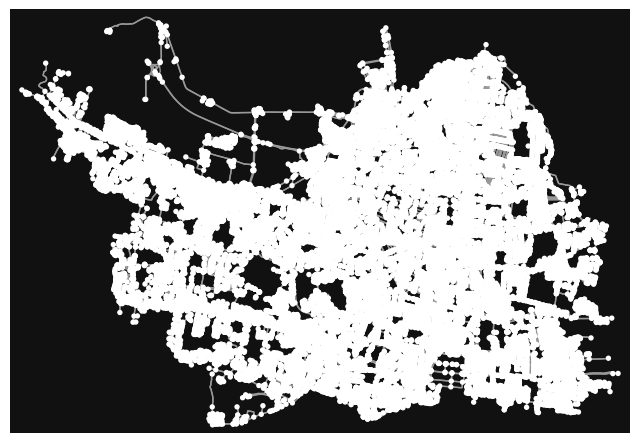

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [30]:
G = ox.graph_from_place( 'Surabaya,Jawa Timur', network_type='drive')
ox.plot_graph(G)